In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

print('setup comptete')

setup comptete


In [2]:
df = pd.read_csv('rainfall in india 1901-2015.csv',encoding='ISO-8859-1')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [4]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [5]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [6]:
groups = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
df=groups.get_group(('BIHAR'))
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,7.3,0.1
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,1.1,0.0
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,0.1,0.0
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,10.6,3.8
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,0.0,0.6


In [7]:
df = df.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
1,1,1902,JAN,4.6
2,2,1903,JAN,5.3
3,3,1904,JAN,6.3
4,4,1905,JAN,16.0


In [8]:
df = df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [9]:
df.columns = ['INDEX','YEAR','Month','avg_rainfall']

In [10]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [11]:
df.shape

(1265, 4)

In [12]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,
   'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
df['Month'] = df.Month.map(d)

In [13]:
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,51.8
115,115,1901,2,19.6
230,230,1901,3,11.9
345,345,1901,4,1.1
460,460,1901,5,65.6
575,575,1901,6,66.3
690,690,1901,7,245.9
805,805,1901,8,319.4
920,920,1901,9,155.1
1035,1035,1901,11,7.3


In [14]:
df['Date'] = pd.to_datetime(df.assign(Day = 1).loc[:,['YEAR','Month','Day']])

In [15]:
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,51.8,1901-01-01
115,115,1901,2,19.6,1901-02-01
230,230,1901,3,11.9,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,65.6,1901-05-01
575,575,1901,6,66.3,1901-06-01
690,690,1901,7,245.9,1901-07-01
805,805,1901,8,319.4,1901-08-01
920,920,1901,9,155.1,1901-09-01
1035,1035,1901,11,7.3,1901-11-01


In [16]:
cols = ['avg_rainfall']
data = df[cols]

In [17]:
data.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [18]:
data.shape

(1265, 1)

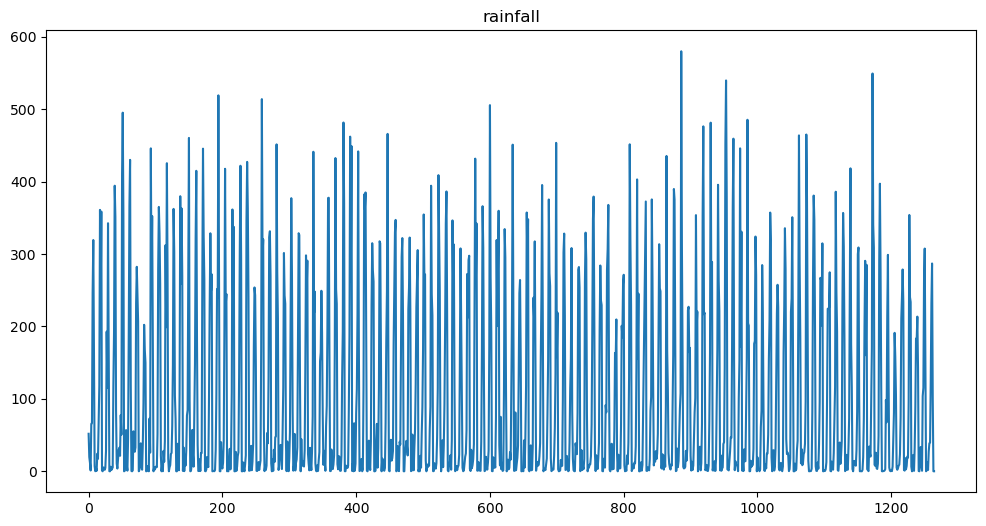

In [19]:
plt.figure(figsize=(12,6))
plt.plot(data.values)
plt.title('rainfall')
plt.show()

In [26]:
data_raw = data.values.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(data_raw)

In [27]:
dataset[:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [28]:
# now we use only 60% data for training and remaing for validation
TRAIN_SIZE = 0.80

train_size = int(len(dataset)*TRAIN_SIZE)
test_size = len(dataset)-train_size
train, test = dataset[0:train_size,:],dataset[train_size : len(dataset),:]
print('Number of entries (training set, test set): '+str((len(train),len(test))))    

Number of entries (training set, test set): (1012, 253)


In [29]:
#  now we face some problem and this would solve by reweitten using numpy shift fucntion
def create_dataset(dataset,window_size=1):
    data_X, data_Y = [],[]
    for i in range(len(dataset) - window_size -1):
        a = dataset[i:(i+window_size),0]
        data_X.append(a)
        data_Y.append(dataset[i+window_size,0])
    return (np.array(data_X),np.array(data_Y))

In [30]:
window_size = 1
train_X,train_Y = create_dataset(train,window_size)
test_X,test_Y = create_dataset(test,window_size)
print('original training data shape')
print(train_X.shape)

original training data shape
(1010, 1)


In [32]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

New training data shape:
(1010, 1, 1)


In [39]:
def fit_model(train_X,train_Y,window_size=1):
    model = Sequential()
    
    model.add(LSTM(2000,activation='tanh',recurrent_activation='hard_sigmoid',input_shape=(1,window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 10, 
              batch_size = 64, 
              )
    return (model)

In [40]:
model1 = fit_model(train_X,train_Y,window_size)

Epoch 1/10
16/16 [==============================] - 6s 150ms/step - loss: 0.0413
Epoch 2/10
16/16 [==============================] - 2s 137ms/step - loss: 0.0364
Epoch 3/10
16/16 [==============================] - 2s 134ms/step - loss: 0.0369
Epoch 4/10
16/16 [==============================] - 2s 130ms/step - loss: 0.0375
Epoch 5/10
16/16 [==============================] - 2s 134ms/step - loss: 0.0374
Epoch 6/10
16/16 [==============================] - 2s 144ms/step - loss: 0.0380
Epoch 7/10
16/16 [==============================] - 2s 132ms/step - loss: 0.0374
Epoch 8/10
16/16 [==============================] - 2s 136ms/step - loss: 0.0361
Epoch 9/10
16/16 [==============================] - 2s 131ms/step - loss: 0.0365
Epoch 10/10
16/16 [==============================] - 2s 135ms/step - loss: 0.0383


In [41]:
import math

def predict_and_score(model,X,Y):
    pred = scaler.inverse_transform(model.predict(X))
    orig_data = scaler.inverse_transform([Y])
    score = math.sqrt(mean_squared_error(orig_data[0],pred[:,0]))
    return (score,pred)

In [43]:
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)
print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

8/8 [==============================] - 0s 12ms/step
Training data score: 108.29 RMSE
Test data score: 96.66 RMSE


Text(0.5, 0, 'Months')

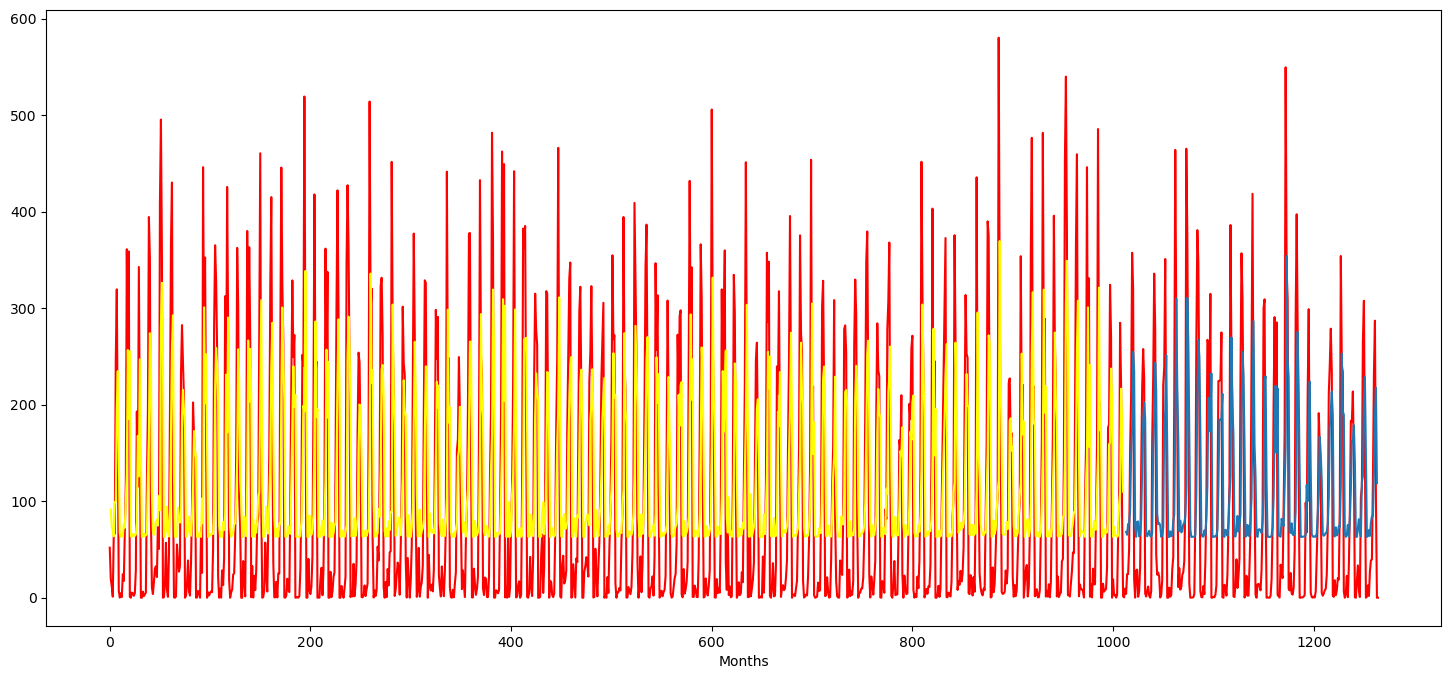

In [44]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")


In [45]:
test_predict

array([[ 68.16406 ],
       [ 65.19908 ],
       [ 76.443596],
       [ 76.443596],
       [ 90.988045],
       [147.19412 ],
       [176.31128 ],
       [254.68663 ],
       [235.11102 ],
       [ 73.59426 ],
       [ 63.056404],
       [ 78.524574],
       [ 78.96254 ],
       [ 63.55096 ],
       [ 66.84656 ],
       [ 80.932785],
       [134.30998 ],
       [180.90309 ],
       [202.1364  ],
       [185.59604 ],
       [ 65.41879 ],
       [ 63.660862],
       [ 66.73675 ],
       [ 69.37141 ],
       [ 64.10041 ],
       [ 63.056404],
       [ 66.681854],
       [151.55121 ],
       [186.12903 ],
       [243.36293 ],
       [213.52983 ],
       [ 87.329475],
       [ 76.06014 ],
       [ 77.26517 ],
       [ 74.909584],
       [ 63.111355],
       [ 64.64978 ],
       [ 72.991264],
       [182.18353 ],
       [191.98659 ],
       [251.33498 ],
       [151.33618 ],
       [ 63.001434],
       [ 63.001434],
       [ 68.76778 ],
       [ 63.605904],
       [ 64.59486 ],
       [ 79.0

In [46]:
train_predict

array([[ 91.37007 ],
       [ 73.7587  ],
       [ 69.535995],
       ...,
       [216.54474 ],
       [181.7034  ],
       [109.93771 ]], dtype=float32)